<a href="https://colab.research.google.com/github/gupta4327/telecomChurnPredictionmodel/blob/main/Telecom_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>



In [ ]:
#importing all necessary libraries and modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.preprocessing import StandardScaler
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting a google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading a csv file of dataset 
file_path = '/content/drive/MyDrive/Colab Notebooks/pandas/dat/Telco-Customer-Churn.csv'
dataset = pd.read_csv(file_path)

In [ ]:
#to visualize first 5 observations 
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


***Data Dictionary***

1.   *Gender - Its self explanatory whether the end user is male or female.*

2.   *Senior Citizen - Whether a end user is senior citizen or not.*
 
3.   *Partner - Whether a user is single or they have partner(Married/live-in)*

4.   *Dependents - If user has any dependents(yes or no)*

5. *Tenure - Time period/years for which is user is using the service*

6. *Phone Service - If user is also using phone services or only internet services*

7. *Multiple Lines - Whether the user has multple lines or not(Yes, No or No Phone Service)*

8. *Internet Service - Method/ Kind of internet service user is using(DSL, Fibre optic,No)*

9. *OnlineSecurity - Customer has opted fore online secutrity or not(Yes or No)*

10. *OnlineBackUp - Customer has choosen onlineback up or n ot(Yes or No)*

11. *DeviceProtection - Customer has device protection or not (Yes or No)*

12. *TechSupport - If customer has taken the help of Tech Support* 

13. *Streaming TV - If customer has opted for TV streaming option* 

14. *Streaming Movies - If customer has opted for movie streaming option*

15. *Contract - User has choosen a year or mponth to month or two tear contract.*

16. *Paperless billing - If a customer have paperless billing or not (yes or no)*

17. *Payment method - Payment method customer uses - electronic check, mailed check, bank transfer or credit card*

18. *Monthly Charges - Monthly charge that a user is paying* 

19. *Total charges - Total charge thst a customer has paid till now.*

20. *Churn - Whether the customer has chuirn or not*






In [ ]:
# basic information of features in dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# checking for null values 
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

*so there are no null values in our dataset. Time to look for duplicates*

In [ ]:
#finding no. of duplicate rows
len(dataset[dataset.duplicated()])

0

*No duplicate rows are there*

In [ ]:
# for checking descriptive stats info of data 
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


*# If we check dataset.head and dataset.info, feature totalcharges shoud be of float type in actual but its of object type so we will converting it into float type*

In [ ]:
#checking for spaces value in Totalcharges column 
dataset[dataset['TotalCharges'] == ' '].shape

(11, 21)

*# Replacing space values with np.nan*

In [ ]:
#replacing null values 
dataset['TotalCharges'].replace({' ': np.nan}, inplace = True)

In [ ]:
#verifying removal of spaces 
dataset[dataset['TotalCharges'] == ' '].shape

(0, 21)

*# so now we have dealt with space values. Now we'll convert the feature into float type*

In [ ]:
#converting into float type
dataset['TotalCharges'] = dataset['TotalCharges'].astype('float64')

In [ ]:
#percentage of null values in TotalCharges
print('percent of Null values in TotalCharges : ', (dataset['TotalCharges'].isnull().sum()/dataset.shape[0])*100)

percent of Null values in TotalCharges :  0.1561834445548772


*# As the percentage of null values is very minute just 0.15 percent so i'll go with dropping null values *

In [ ]:
#dropping null values
dataset.dropna(inplace= True)

*# Now we'll visualize the stats table once again *

In [ ]:
#descriptive stats info 
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
dataset.shape

(7032, 21)

*# Although Senior citizen is coming into numerical feature it is a categorical feature with values 0 and 1*

In [ ]:
# checking for unique values and their counts in senior citizen features
dataset['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

*# Now we are done with basic data cleaning process althouh techiques like outlier treatment hasn't done yet. We'look into it while moving forward. Now we will shift our focus to feature engineering and analysis*

# ***#Feature analysis and engineering***

In [ ]:
#checking for number of unique values in dependent variable(i.e. is churn)
dataset['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

*# So we are with 1869 customers that has been churned and 5163 customers that are still not churned*

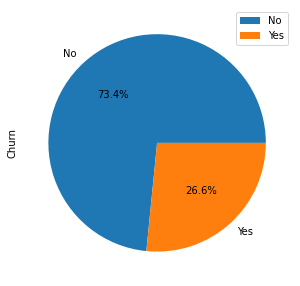

In [ ]:
fig = plt.figure(figsize=(5,5))
churn_counts = dataset['Churn'].value_counts()
churn_counts.plot.pie(labels = churn_counts.index.values, autopct='%1.1f%%')
plt.legend()

*# As Yes is 26.5 percent of total data it is not highly imbalanced class Thus, we can move forward*

# *Customer Identifier*

As customer idenifier is just an unique id of each customer. So it wont be any helpful in our model building so we doent need to perform any kind of analysis over it 

#*Gender*

In [ ]:
#checking for unique values and counts of feature
dataset['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

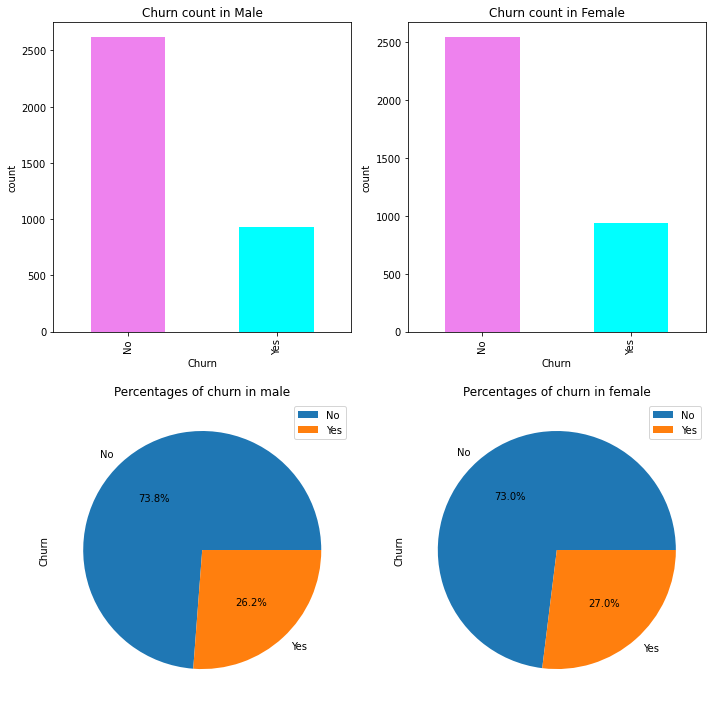

In [ ]:
 #checking if gender plays any significab=nt role in churning
counts_male = dataset[dataset['gender']=='Male']['Churn'].value_counts().sort_index() 
 #checking for churn rate in male and females
counts_female = dataset[dataset['gender']=='Female']['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(10,10))
#barplots
counts_male.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn count in Male')
ax[0,0].set(ylabel = 'count', xlabel='Churn')
counts_female.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn count in Female')
ax[0,1].set(ylabel = 'count', xlabel='Churn')
#pie plots
counts_male.plot.pie(ax = ax[1,0],labels=counts_male.index.values, autopct = '%1.1f%%')
ax[1,0].set_title('Percentages of churn in male')
ax[1,0].legend()
counts_female.plot.pie(ax = ax[1,1],labels=counts_female.index.values, autopct = '%1.1f%%')
ax[1,1].set_title('Percentages of churn in female')
ax[1,1].legend()
fig.tight_layout()

*# So here with the help of bar and pie we can visualize both percentage and counts of specifics(male and female) is same for churned or not churned. So we can conclude from this that gender doest impact our churn rate much* 

# *Senior Citizens*

In [ ]:
#checking for unique values and counts of feature
dataset['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

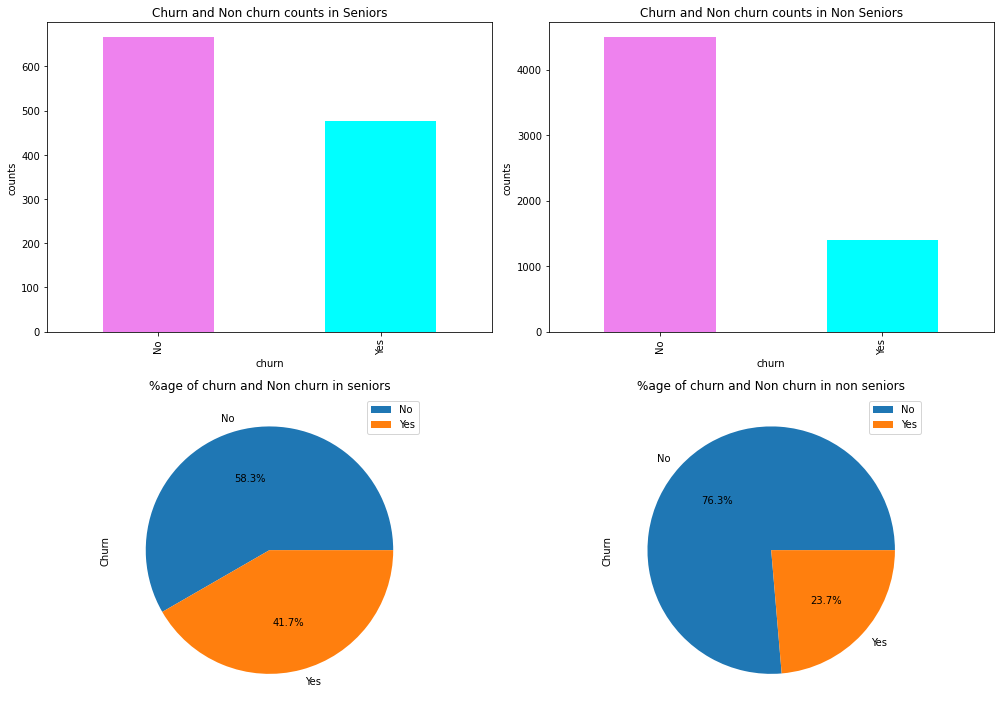

In [ ]:
 #checking if senior citizens have high churning rate
 #segregating senior citizen
counts_senior = dataset[dataset['SeniorCitizen']==1]['Churn'].value_counts().sort_index() 
#segregating non senior citizens
counts_nonsenior = dataset[dataset['SeniorCitizen']==0]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(14,10))
#barplots
counts_senior.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts in Seniors')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_nonsenior.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn and Non churn counts in Non Seniors')
ax[0,1].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_senior.plot.pie(ax = ax[1,0], autopct = '%1.1f%%')
ax[1,0].set_title('%age of churn and Non churn in seniors')
counts_nonsenior.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('%age of churn and Non churn in non seniors')
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

*From the above visualisation we can say that on an average churning rate is higher in Senior Citizens*

# *Partner*

In [ ]:
#checking for unique values and counts of feature
dataset['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

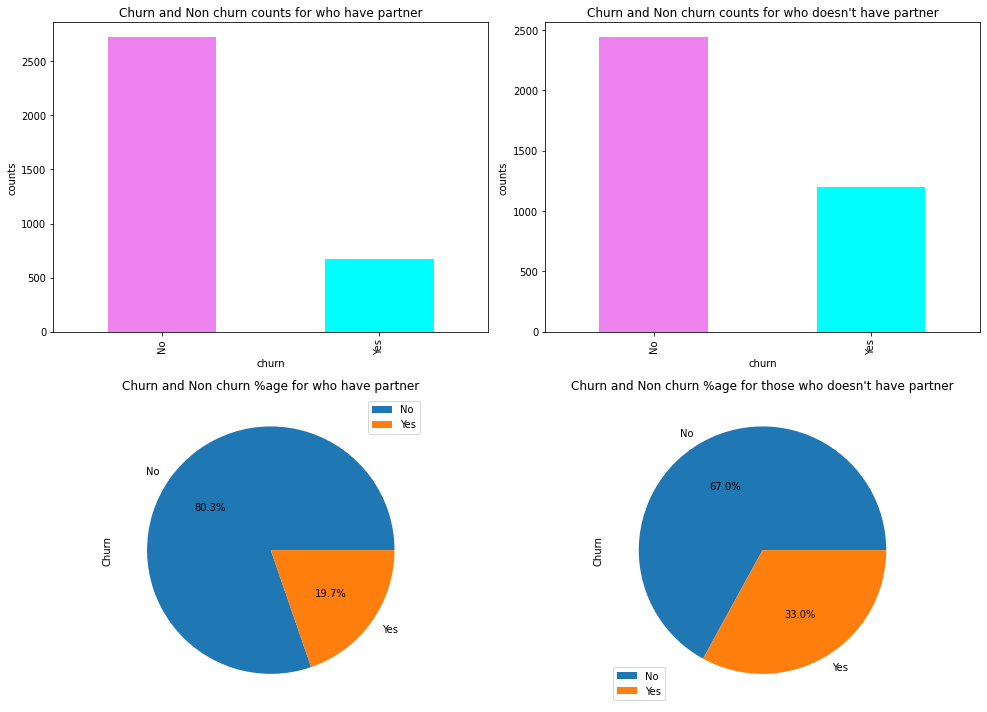

In [ ]:
 #checking if single churns the most or one having partner
#segregating customer with partners
counts_partner = dataset[dataset['Partner']=="Yes"]['Churn'].value_counts().sort_index() 
#segregating customer having no partners
counts_nopartner = dataset[dataset['Partner']=="No"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(14,10))
#barplots
counts_partner.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for who have partner')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_nopartner.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn and Non churn counts for who doesn\'t have partner')
ax[0,1].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_partner.plot.pie(ax = ax[1,0], autopct = '%1.1f%%')
ax[1,0].set_title('Churn and Non churn %age for who have partner')
counts_nopartner.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for those who doesn\'t have partner')
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

*From the visualization and counts we can see that customers with partner plan have lower chances to churn as compare to those who doesn't opt for partner plans*

# *Dependents*

In [ ]:
#checking for unique values and counts for feature
dataset['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

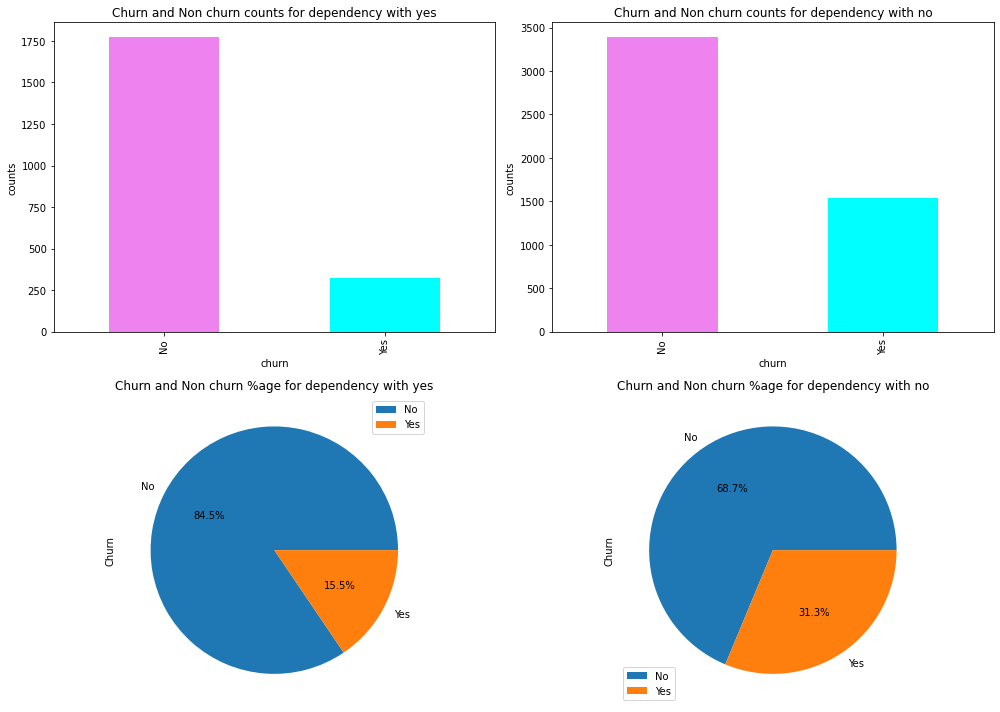

In [ ]:
 #checking if one with dependents usually churns or a one whith no dependents
#segregating customer that have dependents
counts_dependency = dataset[dataset['Dependents']=="Yes"]['Churn'].value_counts().sort_index() 
#segregating customer that doesn't have dependents 
counts_nondependency = dataset[dataset['Dependents']=="No"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(14,10))
#barplots
counts_dependency.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for dependency with yes')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_nondependency.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn and Non churn counts for dependency with no')
ax[0,1].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_dependency.plot.pie(ax = ax[1,0], autopct = '%1.1f%%')
ax[1,0].set_title('Churn and Non churn %age for dependency with yes')
counts_nondependency.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for dependency with no')
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

*# Churn rate is higher in ones having dependent value as no*

# *Phone Services*

In [ ]:
#checking for unique values and counts for feature
dataset['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

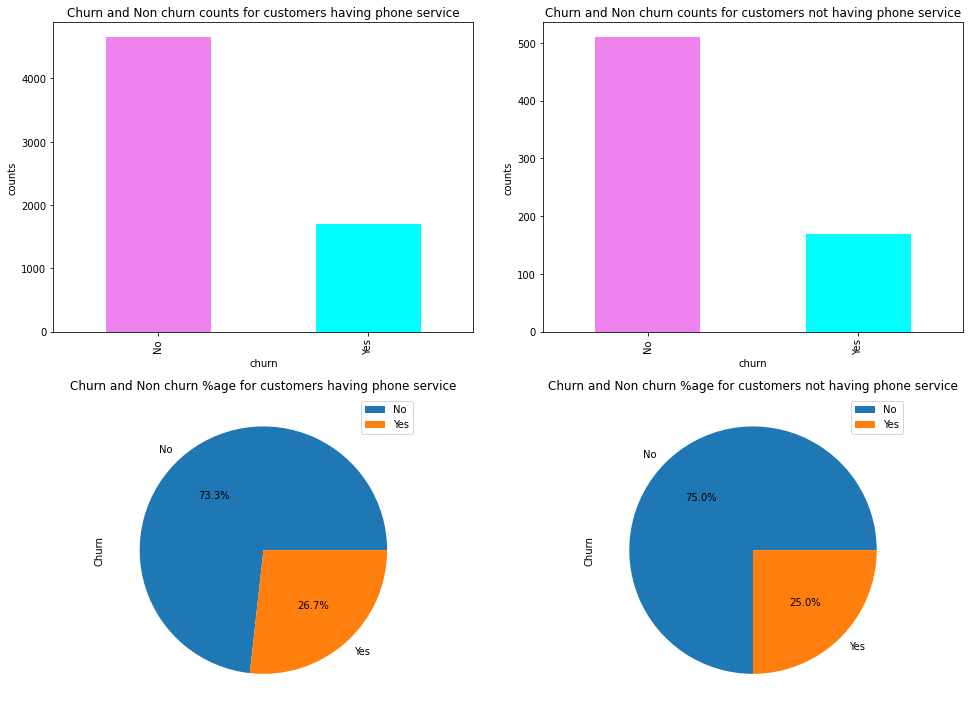

In [ ]:
 #checking for churn rate among cutomers who also have phone service along with internet service
counts_phnsrvice = dataset[dataset['PhoneService']=="Yes"]['Churn'].value_counts().sort_index() 
counts_nophnsrvice = dataset[dataset['PhoneService']=="No"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(14,10))
#barplots
counts_phnsrvice.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for customers having phone service')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_nophnsrvice.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn and Non churn counts for customers not having phone service')
ax[0,1].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_phnsrvice.plot.pie(ax = ax[1,0], autopct = '%1.1f%%')
ax[1,0].set_title('Churn and Non churn %age for customers having phone service')
counts_nophnsrvice.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for customers not having phone service')
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

*Phone service doesnt seems to be have any effect on churn rate*

# ***Online Security***

In [ ]:
#checking for unique values and counts for feature
dataset['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

*Although we have 3 different values we'll only look for 2 (yes or no) because we want to analyse when user have an opportunity to opt for online security what was the churn rate among those who choose online security and who didn't. And also feature No internet service will be covered or investigated later under Internet services features.*

*Note - Same is true for upcoming 3 or 4 features*

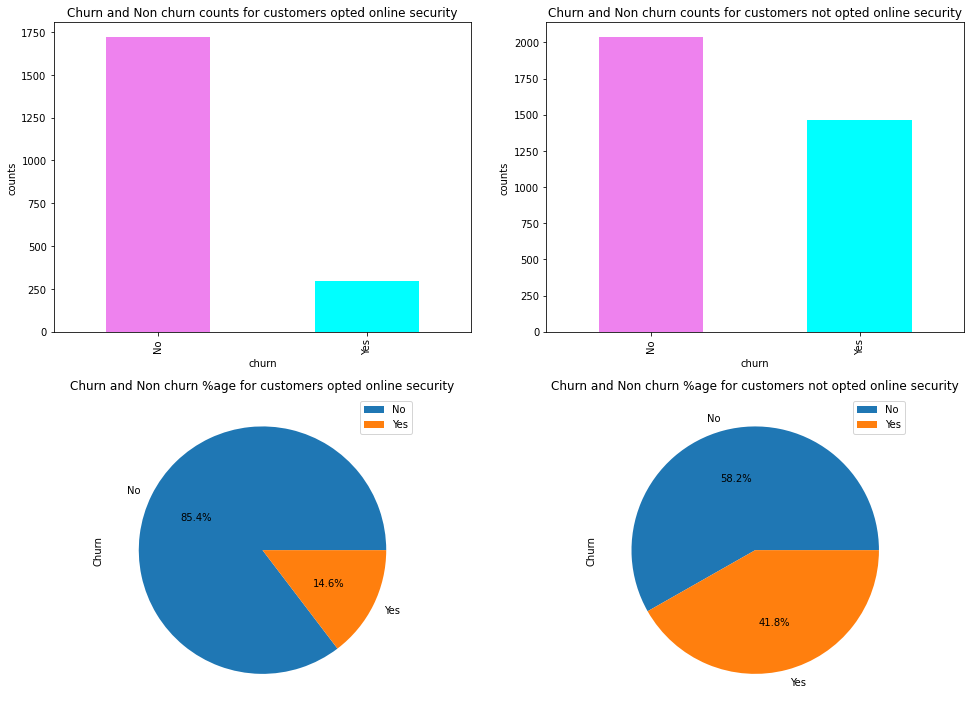

In [ ]:
 #checking for churn rate among cutomers who have opted for online services and one who haven't
counts_sec_yes = dataset[dataset['OnlineSecurity']=="Yes"]['Churn'].value_counts().sort_index() 
counts_sec_no = dataset[dataset['OnlineSecurity']=="No"]['Churn'].value_counts().sort_index()
fig, ax = plt.subplots(2,2, figsize=(14,10))
#barplots
counts_sec_yes.plot.bar(ax = ax[0,0],color=['violet', 'cyan'])
ax[0,0].set_title('Churn and Non churn counts for customers opted online security')
ax[0,0].set(ylabel = 'counts', xlabel='churn')
counts_sec_no.plot.bar(ax = ax[0,1],color=['violet', 'cyan'])
ax[0,1].set_title('Churn and Non churn counts for customers not opted online security')
ax[0,1].set(ylabel = 'counts', xlabel='churn')
#pieplots
counts_sec_yes.plot.pie(ax = ax[1,0], autopct = '%1.1f%%')
ax[1,0].set_title('Churn and Non churn %age for customers opted online security')
counts_sec_no.plot.pie(ax = ax[1,1],autopct = '%1.1f%%')
ax[1,1].set_title('Churn and Non churn %age for customers not opted online security')
ax[1,0].legend()
ax[1,1].legend()
fig.tight_layout()

*Customers who haven't opted for online security has bit higher possibility of churn as compare to one who have opted*